In [1]:
import pandas as pd

In [2]:
path = "../../data/cleaned/merged_sales.csv"
car_sales = pd.read_csv(path)

In [3]:
car_sales2 = car_sales.reset_index(drop=True).set_index("Category")
car_sales3 = car_sales2.T.reset_index()
car_sales3.rename(columns={"index": "year"}, inplace=True)
car_sales3.rename(columns={"EV Sales": "ev_sales", "PHEV Sales": "phev_sales", "Production, total": "tot_prod", "Domestic sales, totalb": "tot_sales"}, inplace=True)

In [4]:
car_sales4 = car_sales3.drop(['Passenger cars', 'Commercial vehiclesa', 'Passenger cars', 'Commercial vehiclesa'], axis=1)
car_sales4["year"] = car_sales4["year"].astype(int)
car_sales4.head()

/Users/juanferc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Category,year,ev_sales,phev_sales,tot_prod,tot_sales
0,2011,10092,7671,8662000,10109000
1,2012,14587,38584,10336000,11582000
2,2013,48094,49008,11067000,12479000
3,2014,63525,55357,11661000,13389000
4,2015,71064,42959,12106000,14128000


In [5]:
path2 = "../../data/cleaned/merged_energy_emission.csv"
emission_energy = pd.read_csv(path2)
# emission_energy.columns

# unit of renewable energy - Trillion BTU, emission unit - Million Metric tons 

In [6]:
emission_energy2 = emission_energy[["year","total_emission", "transportation_emission", "motor_emission", "total renewable energy consumption"]]

emission_energy3 = emission_energy2.rename(columns={"total renewable energy consumption": "tot_ren_energy"})
# emission_energy3 = emission_energy3.astype(float64)
emission_energy3.head()

# df = df.astype(int)

,year,total_emission,transportation_emission,motor_emission,tot_ren_energy
0,1990,"5,039.90","1,587.60",966.8,6040.024
1,1991,"4,994.60","1,567.90",962.4,6067.785
2,1992,"5,094.90","1,591.60",979.1,5820.556
3,1993,"5,185.80","1,604.20",993.1,6081.635
4,1994,"5,263.60","1,644.10","1,004.10",5987.142


In [7]:
merge_df = pd.merge(left=car_sales4, right=emission_energy3, left_on='year', right_on='year')
merge_df.head()
# merge_df.to_csv("../../data/final_merged_data.csv")

,year,ev_sales,phev_sales,tot_prod,tot_sales,total_emission,transportation_emission,motor_emission,tot_ren_energy
0,2011,10092,7671,8662000,10109000,"5,445.70","1,809.00","1,057.00",9204.160
1,2012,14587,38584,10336000,11582000,"5,229.00","1,773.40","1,051.10",8847.119
2,2013,48094,49008,11067000,12479000,"5,356.00","1,796.40","1,066.00",9450.625
3,2014,63525,55357,11661000,13389000,"5,413.20","1,814.90","1,077.20",9740.360
4,2015,71064,42959,12106000,14128000,"5,262.90","1,838.80","1,083.10",9720.544


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
final_df = pd.read_csv("../../data/final_merged_data.csv")
final_df.head(100)

,Unnamed: 0,year,ev_sales,phev_sales,tot_prod,tot_sales,total_emission,transportation_emission,motor_emission,tot_ren_energy
0,0,2011,10092,7671,8662000,10109000,"5,445.70","1,809.00","1,057.00",9204.160
1,1,2012,14587,38584,10336000,11582000,"5,229.00","1,773.40","1,051.10",8847.119
2,2,2013,48094,49008,11067000,12479000,"5,356.00","1,796.40","1,066.00",9450.625
3,3,2014,63525,55357,11661000,13389000,"5,413.20","1,814.90","1,077.20",9740.360
4,4,2015,71064,42959,12106000,14128000,"5,262.90","1,838.80","1,083.10",9720.544
5,5,2016,86731,772885,12180000,13969000,"5,170.40","1,871.00","1,101.60",10362.530
6,6,2017,104492,91089,11190000,13644000,"5,130.70","1,887.50","1,098.90",11076.515
7,7,2018,238823,122492,11298000,13717000,"5,280.90","1,917.80","1,099.00",11300.980


In [10]:
finalized_df = final_df.drop(["Unnamed: 0"], axis=1)

In [11]:
finalized_df["total_emission"] = finalized_df["total_emission"].apply(lambda x: float(x.split()[0].replace(',', '')))
finalized_df["transportation_emission"] = finalized_df["transportation_emission"].apply(lambda x: float(x.split()[0].replace(',', '')))
finalized_df["motor_emission"] = finalized_df["motor_emission"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [12]:
finalized_df.dtypes

year                         int64
ev_sales                     int64
phev_sales                   int64
tot_prod                     int64
tot_sales                    int64
total_emission             float64
transportation_emission    float64
motor_emission             float64
tot_ren_energy             float64
dtype: object

In [13]:
# R2 = 0.96
# X = finalized_df[["year"]]
# y = finalized_df["ev_sales"].values.reshape(-1,1)

# # R2 = 0.47 - There is moderate linear relationship between EV sales and renewable energy production
# X = finalized_df[["tot_sales","tot_ren_energy"]]
# y = finalized_df["ev_sales"].values.reshape(-1,1)

# R2 = -0.2 - No correlation exists between EV sales and motor vehicle CO2 emission rates
X = finalized_df[["year"]]
y = finalized_df["ev_sales"].values.reshape(-1,1)
# R2 = 0.91
# X = finalized_df[["tot_sales","tot_ren_energy"]]
# y = finalized_df["year"].values.reshape(-1,1)

# R2 = -0.23
# X = finalized_df[["phev_sales","motor_emission"]]
# y = finalized_df["year"].values.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[25882.04761905]]
y-axis intercept:  [-52059708.92857141]


In [17]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

# Revising values of training and testing score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7770216802046521
Testing Score: 0.419827669997033


In [18]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

# Revising productivity of model by printing Mean Standard Error and R2 score
print(f"MSE: {MSE}, R2: {r2}")

MSE: 754913960.6559393, R2: 0.419827669997033


In [19]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
# prediction = model1.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# We assume there is a positively correlated linear relationship between ev_sales through the range of time depicted below
ev_sales_lst = []
for x in range(2019,2026):
    new_t = model1.predict([[x]])
    ev_sales_lst.append(int(new_t))
ev_sales_lst

[206877, 233999, 261121, 288243, 315365, 342487, 369609]

In [21]:
X1 = finalized_df[["year"]]
y1 = finalized_df["tot_sales"].values.reshape(-1,1)

In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42)

In [23]:
model2 = LinearRegression()
model2.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model2.fit(X_train1, y_train1)
training_score1 = model2.score(X_train1, y_train1)
testing_score1 = model2.score(X_test1, y_test1)


In [25]:
predictions1 = model2.predict(X_test1)
tot_sales_MSE = mean_squared_error(y_test1, predictions1)
tot_sales_r2 = model.score(X_test1, y_test1)
print(f"MSE: {tot_sales_MSE}, R2: {tot_sales_r2}")

MSE: 100426516000.0, R2: -113.21694427748278


In [26]:
tot_sales_lst = []
for x in range(2019,2026):
    new_x = model2.predict([[x]])
    tot_sales_lst.append(int(new_x))
tot_sales_lst

[14923140, 15387480, 15851820, 16316160, 16780500, 17244840, 17709180]

Text(0.5, 1.0, 'Residual Plot')

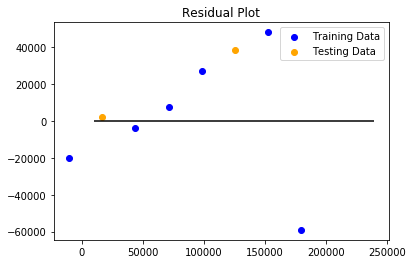

In [27]:
# Plotting residuals for training and testing data using plotly from matplotlib library
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

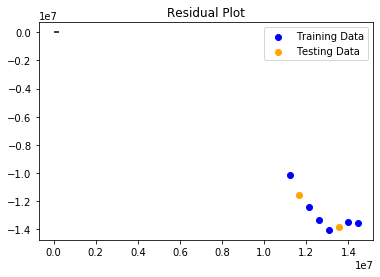

In [28]:
plt.scatter(model2.predict(X_train1), model.predict(X_train1) - y_train1, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test1), model.predict(X_test1) - y_test1, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [29]:
years = [2019,2020,2021,2022,2023,2024,2025]
years_df = pd.DataFrame(years, columns=['Year'])
df = pd.DataFrame(ev_sales_lst, columns=['Ev_sales'])
df1 = pd.DataFrame(tot_sales_lst, columns=['Total_sales'])

In [30]:
d = {'year': years, 'total_sales': tot_sales_lst, 'ev_sales': ev_sales_lst}
year_vs_sales_df = pd.DataFrame(d)
year_vs_sales_df.head(10)

,year,total_sales,ev_sales
0,2019,14923140,206877
1,2020,15387480,233999
2,2021,15851820,261121
3,2022,16316160,288243
4,2023,16780500,315365
5,2024,17244840,342487
6,2025,17709180,369609
